In [1]:
# First, let's setup the portfolio.
# This portfolio is based on my YAHOO FINANCE watchlist

In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [4]:
data_source = 'yahoo'
start = '2017-1-1' #The year I started to 'watch'
PG = wb.DataReader('PG', data_source , start)

In [30]:
tickers = ['SPOT', 'PLNT', 'TRP', 'HSE.TO', 'WTI', 
           'MU', 'INTC', 'IBM', 'NKE','ADDYY', 'ZUMZ', 
           'LB', 'AAPL', 'MSFT', 'BMO', 'TD', 'LULU', 
           'RY', 'TRI', 'GIL', 'BHC', 'GE', 'HBM.TO', 
           'CMG.TO', 'BBD-B.TO', 'TRST.TO', 'WJA.TO']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source= 'yahoo', start = '2017-1-1')['Adj Close']

In [32]:
mydata.head()

,SPOT,PLNT,TRP,HSE.TO
Date,,,,
2018-04-03,149.009995,36.730000,36.717171,17.706720
2018-04-04,144.220001,37.660000,37.425220,17.424427
2018-04-05,143.990005,38.910000,38.611423,17.979284
2018-04-06,147.919998,38.810001,38.133263,17.531506
2018-04-09,150.000000,38.419998,38.409126,17.356287


<function matplotlib.pyplot.show(*args, **kw)>

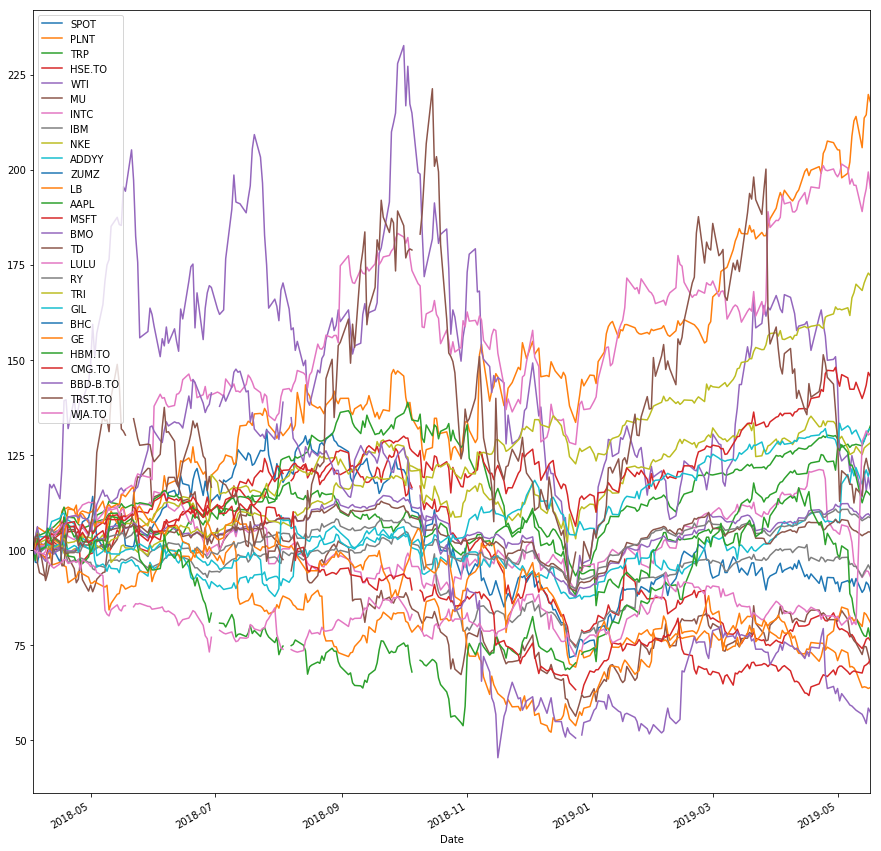

In [17]:
# Normalization to 100 = Pt/P0 * 100
(mydata/mydata.iloc[0]*100).plot(figsize = (15,16));
plt.show

In [18]:
returns = (mydata / mydata.shift(1))-1
returns.head()

,SPOT,PLNT,TRP,HSE.TO,WTI,MU,INTC,IBM,NKE,ADDYY,...,RY,TRI,GIL,BHC,GE,HBM.TO,CMG.TO,BBD-B.TO,TRST.TO,WJA.TO
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-04,-0.032145,0.025320,0.019284,-0.015943,0.035461,0.035694,0.004824,0.028495,0.025787,0.020078,...,-0.003912,0.015416,0.012397,NaN,0.011424,-0.027304,-0.003236,-0.010870,0.032738,-0.001688
2018-04-05,-0.001595,0.033192,0.031695,0.031844,0.025114,-0.066492,0.007802,-0.000584,0.017100,0.016836,...,0.009688,0.008856,0.003061,NaN,0.011295,0.058480,0.019481,0.021978,0.008646,-0.006340
2018-04-06,0.027294,-0.002570,-0.012384,-0.024905,-0.035635,-0.027689,-0.031560,-0.022463,-0.029315,-0.002720,...,-0.011022,-0.005016,-0.012208,NaN,-0.027550,-0.028729,0.007431,-0.018817,-0.030000,0.001276
2018-04-09,0.014062,-0.010049,0.007234,-0.009994,-0.018476,-0.010318,0.015577,0.014080,-0.005477,0.000882,...,0.011669,0.007562,0.004463,NaN,-0.017611,0.007964,0.012645,-0.021918,-0.089838,-0.005947


In [36]:
annual_returns = returns.mean() * 250
annual_returns

SPOT       -0.021867
PLNT        0.750080
TRP         0.266169
HSE.TO     -0.220115
WTI         0.367396
MU         -0.207416
INTC       -0.016594
IBM        -0.017833
NKE         0.254383
ADDYY       0.206730
ZUMZ       -0.015460
LB         -0.307694
AAPL        0.163280
MSFT        0.364229
BMO         0.084321
TD          0.049314
LULU        0.668477
RY          0.080927
TRI         0.494830
GIL         0.282723
BHC         0.231820
GE         -0.096559
HBM.TO     -0.160260
CMG.TO     -0.241339
BBD-B.TO   -0.233755
TRST.TO     0.509883
WJA.TO      0.407989
dtype: float64

In [38]:
# There has gotta be a better/ more efficient method to do this lol...
# This assumes that all equities are equally included in this portfolio
# Our optimization includes optimizing these weights
# among other things
weights = ([0.0370,0.0370,0.0370,0.0370,0.0370,0.0370,
           0.0370,0.0370,0.0370,0.0370,0.0370,0.0370,
           0.0370,0.0370,0.0370,0.0370,0.0370,0.0370,
           0.0370,0.0370,0.0370,0.0370,0.0370,0.0370,
           0.0370,0.0370,0.0370,])

In [39]:
np.dot(annual_returns,weights)

0.13481533746564858

In [41]:
pfolio_me = (str(round(np.dot(annual_returns, weights),5)*100)) + '%'
print (pfolio_me)

13.482%
